In [0]:
from google.colab import drive

In [0]:
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import os

In [0]:
os.chdir('/drive/My Drive/Machine Learning/Logistic Regression')

In [0]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('./titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analysing the Data

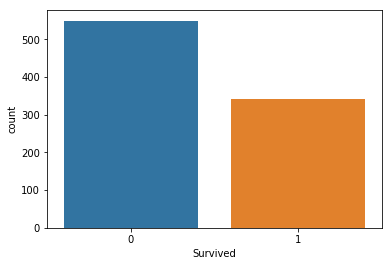

In [0]:
sns.countplot(x='Survived',data=data)

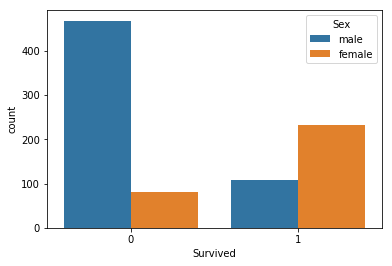

In [0]:
# How many males and how many females survived
sns.countplot(x='Survived',hue='Sex',data=data)

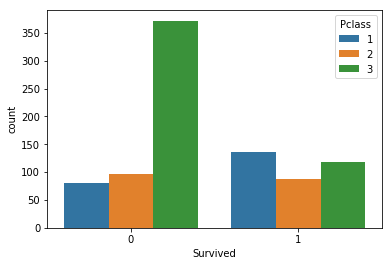

In [0]:
#How is the survival variation based on class
sns.countplot(x='Survived',hue='Pclass',data=data)

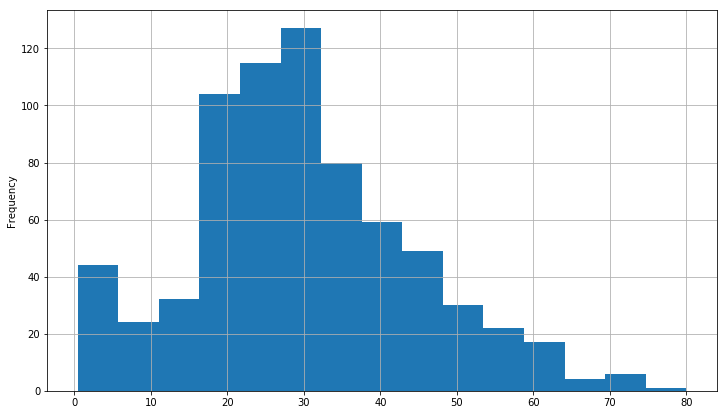

In [0]:
data['Age'].plot.hist(bins=15,grid=True,figsize=(12,7))

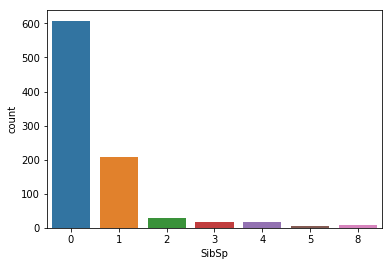

In [0]:
# No. of Siblings or Spouse that have boarded on titanic
sns.countplot(x='SibSp',data=data)
plt.show()

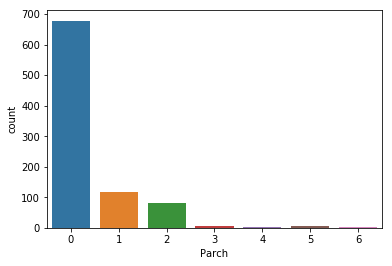

In [0]:
#No of Parents and Children that have boarded on titanic
sns.countplot(x='Parch',data=data)
plt.show()

# Data Wrangling

In [0]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

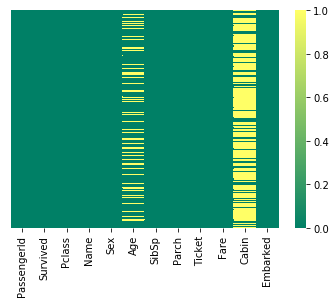

In [0]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='summer')

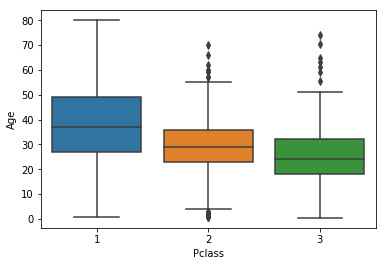

In [0]:
sns.boxplot(x='Pclass',y='Age',data=data)
plt.show()

In [0]:
data.drop(columns=['Cabin'],axis=1,inplace=True)

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
Age_mean = data['Age'].mean()

In [0]:
data.Age.fillna(value=Age_mean,inplace=True)

In [0]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [0]:
data.dropna(inplace=True)

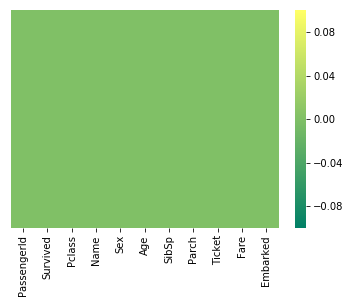

In [0]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='summer')

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
# Converting into numerical data
gender = pd.get_dummies(data['Sex'],drop_first=True)
gender.head()

In [0]:
embarked = pd.get_dummies(data['Embarked'],drop_first=True)
embarked.head()

In [0]:
Pcl = pd.get_dummies(data['Pclass'],drop_first=True)
Pcl.head()

In [0]:
data = pd.concat([data,gender,embarked,Pcl],axis=1)
data.head()

In [0]:
# Now Drop Pclass Embarked and sex columns and also PassengerId Name Ticket which are primary keys
wrangled_data = data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1)

In [0]:
wrangled_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [0]:
def logistic(t):
  return 1.0/(1+math.exp((-1.0)*t))

In [0]:
t = np.linspace(-6,6,500)
#print(t)
y = np.array([logistic(ele) for ele in t])
print(y)

[0.00247262 0.00253265 0.00259414 0.00265711 0.00272161 0.00278766
 0.00285532 0.00292462 0.00299559 0.00306827 0.00314272 0.00321897
 0.00329706 0.00337703 0.00345895 0.00354284 0.00362875 0.00371675
 0.00380687 0.00389916 0.00399369 0.0040905  0.00418964 0.00429118
 0.00439516 0.00450166 0.00461072 0.00472241 0.0048368  0.00495394
 0.00507391 0.00519676 0.00532258 0.00545142 0.00558336 0.00571848
 0.00585685 0.00599855 0.00614366 0.00629225 0.00644441 0.00660023
 0.0067598  0.00692319 0.0070905  0.00726183 0.00743726 0.0076169
 0.00780085 0.0079892  0.00818206 0.00837954 0.00858175 0.00878879
 0.00900078 0.00921783 0.00944007 0.00966762 0.0099006  0.01013913
 0.01038335 0.01063339 0.01088938 0.01115147 0.01141979 0.01169449
 0.01197572 0.01226363 0.01255838 0.01286011 0.013169   0.0134852
 0.0138089  0.01414025 0.01447943 0.01482663 0.01518202 0.0155458
 0.01591816 0.01629929 0.01668938 0.01708865 0.01749731 0.01791555
 0.01834361 0.0187817  0.01923005 0.01968889 0.02015845 0.0206389

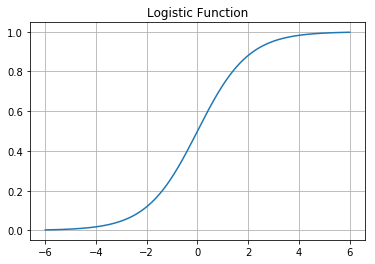

In [0]:
plt.plot(t,y)
plt.title('Logistic Function')
plt.grid(True)
plt.show()

# Train Data

In [0]:
X = wrangled_data.drop('Survived',axis=1)
Y = wrangled_data['Survived']

In [0]:
from sklearn.model_selection import train_test_split #cross_validation
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()

In [0]:
model = logmodel.fit(X_train,Y_train)

In [0]:
predictions = model.predict(X_test)
predictions

In [0]:
from sklearn.metrics import classification_report

In [0]:
classification_report(Y_test,predictions).split('\n')

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix(Y_test,predictions)

In [0]:
from sklearn.metrics import accuracy_score,precision_score

In [0]:
accuracy_score(Y_test,predictions)

0.8014981273408239

In [0]:
precision_score(Y_test,predictions)

0.7368421052631579

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred